<a href="https://colab.research.google.com/github/satyazmx/Assignments/blob/main/AMNIST-ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow

In [2]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [3]:
(X_train, y_train),(X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
import matplotlib.pyplot as plt

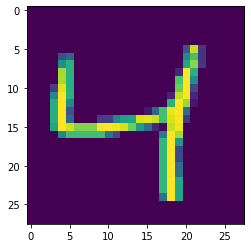

In [9]:
plt.imshow(X_train[2])

In [10]:
X_train = X_train/255
X_test = X_test/255

In [23]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10,activation='softmax'))

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam')

In [27]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2753 - val_loss: 0.1416
Epoch 2/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1153 - val_loss: 0.1135
Epoch 3/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0787 - val_loss: 0.1029
Epoch 4/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0601 - val_loss: 0.0945
Epoch 5/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0466 - val_loss: 0.0932
Epoch 6/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0360 - val_loss: 0.0948
Epoch 7/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0286 - val_loss: 0.1116
Epoch 8/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0271 - val_loss: 0.1084
Epoch 9/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0210 - val_loss: 0.1012
Epoch 10/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.020

In [28]:
y_prob = model.predict(X_test)

In [29]:
 y_pred = y_prob.argmax(axis=1)

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(y_test,y_pred)

0.9771

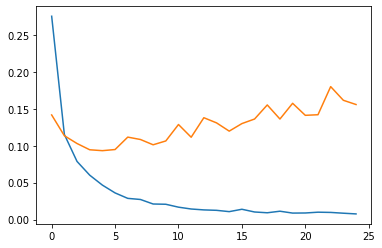

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

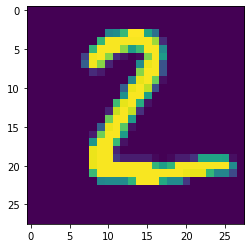

In [41]:
plt.imshow(X_test[1])

In [42]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

array([2])